# 4 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC, NuSVC

import warnings
warnings.filterwarnings('ignore')

In [3]:
le_Df = pd.read_csv("C:/Users/HP/Documents/EDA/Python/Life_Expectancy/clean_Life Expectancy Data.csv")
le_Df.head(20)

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345,19.2,19.3,0.405,8.1


The goal is to rearrange our data to carry single country index, as well as carry outour target columns `life_expectancy` to the end of the dataset.

In [4]:
df = le_Df.groupby([le_Df['country'], le_Df['status']]).mean().reset_index()

Let us drop the Year column, given we have most data date in uniform, save for some countries that produced data for a single year.

In [5]:
df.set_index(df['country'], inplace = True)
df.head()

,country,status,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Afghanistan,Developing,2007.5,58.19375,269.0625,78.2500,0.014375,34.960110,64.5625,2362.2500,...,48.3750,8.252500,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250
Albania,Albania,Developing,2007.5,75.15625,45.0625,0.6875,4.848750,193.259091,98.0000,53.3750,...,98.1250,5.945625,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750
Algeria,Algeria,Developing,2007.5,73.61875,108.1875,20.3125,0.495938,236.185241,76.6250,1943.8750,...,91.7500,4.737188,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250
Angola,Angola,Developing,2007.5,49.01875,328.5625,83.7500,5.650000,102.100268,77.1250,3561.3125,...,46.1250,3.886875,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375
Antigua and Barbuda,Antigua and Barbuda,Developing,2007.5,75.05625,127.5000,0.0000,7.777813,1001.585226,98.0625,0.0000,...,96.9375,4.752188,98.3125,0.12500,9759.305728,2.253134e+07,3.42500,3.37500,0.488625,8.84375


In [6]:
df.drop(columns = ['year'], inplace = True)

Next, let us label-encode the `status` categorical data

In [7]:
dummies = pd.get_dummies(df['status'], prefix = 'status')

df = df.drop(columns = 'status').join(dummies)
df.head()

,country,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,...,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling,status_Developed,status_Developing
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Afghanistan,58.19375,269.0625,78.2500,0.014375,34.960110,64.5625,2362.2500,15.51875,107.5625,...,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250,0,1
Albania,Albania,75.15625,45.0625,0.6875,4.848750,193.259091,98.0000,53.3750,49.06875,0.9375,...,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750,0,1
Algeria,Algeria,73.61875,108.1875,20.3125,0.495938,236.185241,76.6250,1943.8750,48.74375,23.5000,...,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250,0,1
Angola,Angola,49.01875,328.5625,83.7500,5.650000,102.100268,77.1250,3561.3125,18.01875,132.6250,...,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375,0,1
Antigua and Barbuda,Antigua and Barbuda,75.05625,127.5000,0.0000,7.777813,1001.585226,98.0625,0.0000,38.42500,0.0000,...,98.3125,0.12500,9759.305728,2.253134e+07,3.42500,3.37500,0.488625,8.84375,0,1


Reorder Columns

In [8]:
df = df[['status_Developed', 'status_Developing', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_10-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling', 'life_expectancy']]
df.head().T

country,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda
status_Developed,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
status_Developing,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00
adult_mortality,2.690625e+02,45.062500,1.081875e+02,3.285625e+02,1.275000e+02
infant_deaths,7.825000e+01,0.687500,2.031250e+01,8.375000e+01,0.000000e+00
alcohol,1.437500e-02,4.848750,4.959375e-01,5.650000e+00,7.777813e+00
percentage_expenditure,3.496011e+01,193.259091,2.361852e+02,1.021003e+02,1.001585e+03
hepatitis_b,6.456250e+01,98.000000,7.662500e+01,7.712500e+01,9.806250e+01
measles,2.362250e+03,53.375000,1.943875e+03,3.561312e+03,0.000000e+00
bmi,1.551875e+01,49.068750,4.874375e+01,1.801875e+01,3.842500e+01
under-five_deaths,1.075625e+02,0.937500,2.350000e+01,1.326250e+02,0.000000e+00


## Data Visualization

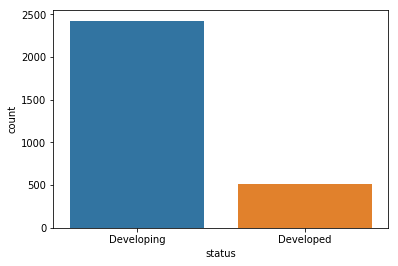

In [9]:
sns.countplot(le_Df['status'])

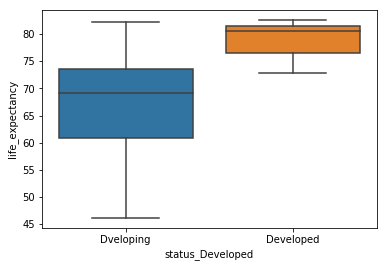

In [10]:
sns.boxplot(x="status_Developed", 
            y="life_expectancy", 
            data = df)
plt.xticks((0,1),['Dveloping', 'Developed'])
plt.show()

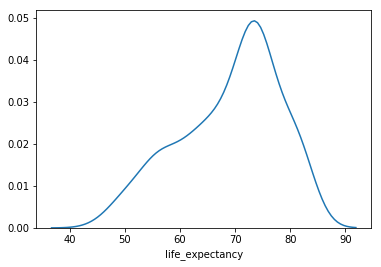

In [11]:
sns.distplot(df['life_expectancy'], hist = False)

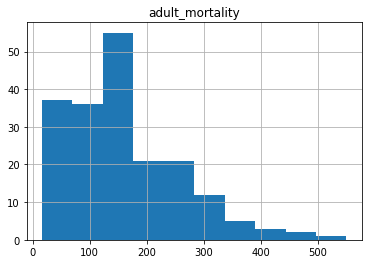

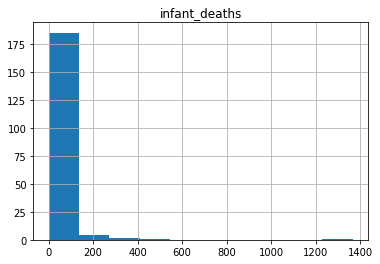

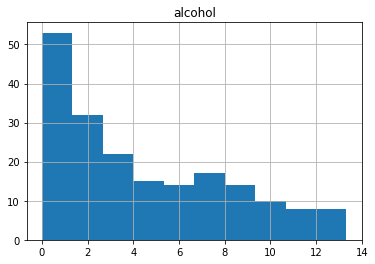

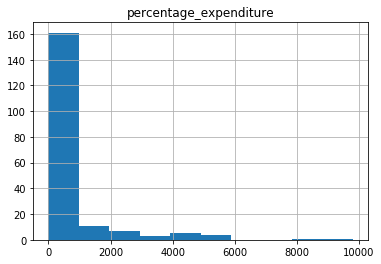

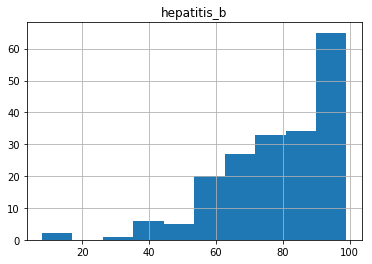

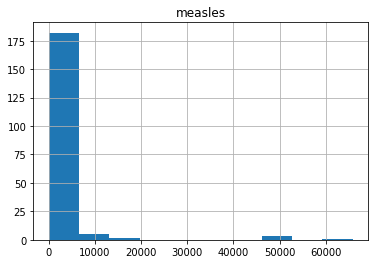

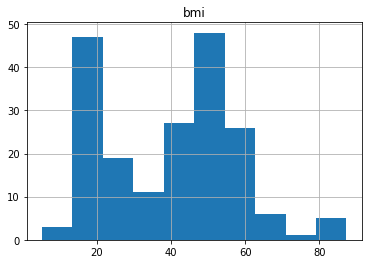

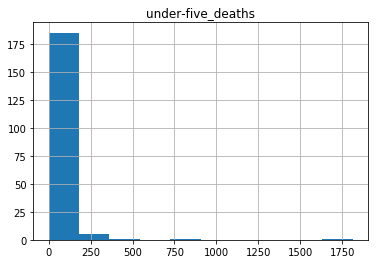

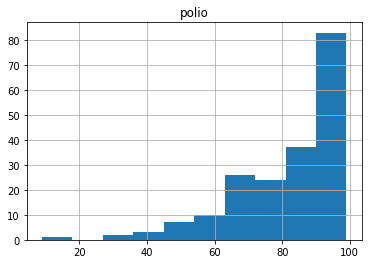

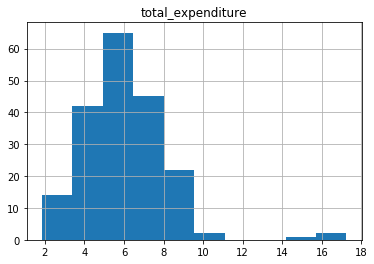

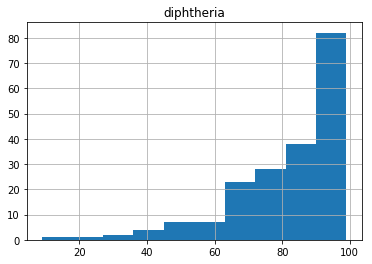

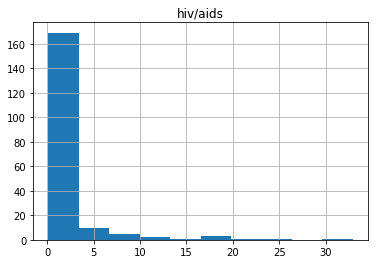

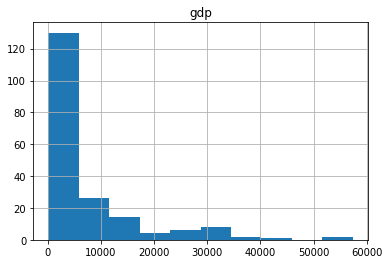

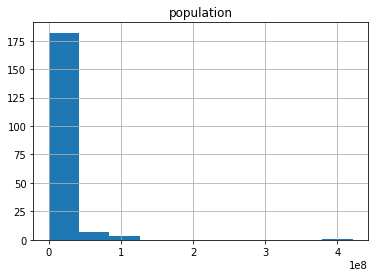

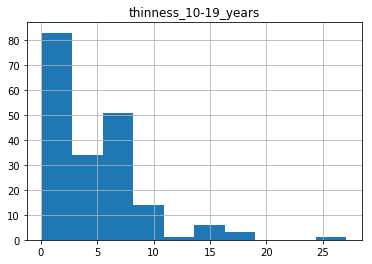

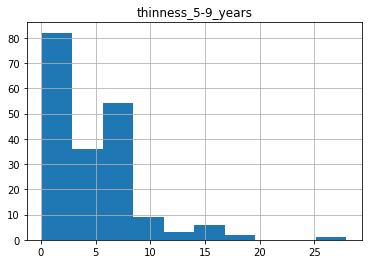

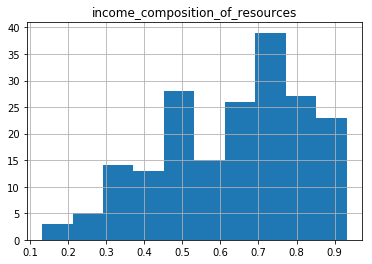

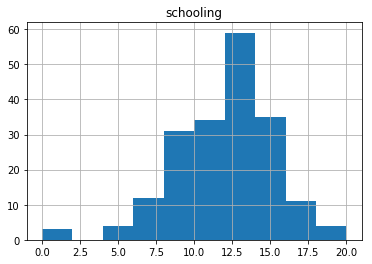

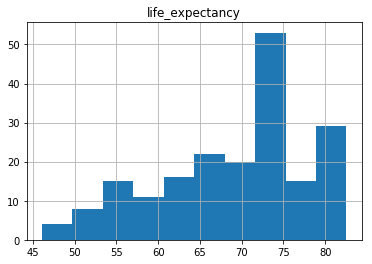

In [12]:
cont_feat = df.drop(columns = ['status_Developed','status_Developing']).columns
for i in cont_feat:
    df[i].hist()
    plt.title(i)
    plt.show()

In [13]:
corrs = df.corr().unstack().sort_values(kind = 'quicksort').reset_index()
corr = corrs[corrs['level_0'] != corrs['level_1']][::2][::-1]

<a style="color: blue;"> ASIDE </a>: Let us see what life is like in Developed vs Developing Countries. 

The two following chunks gives us a summary of the characteristics of this dichotomy.

In [14]:
# Correlations in Developing Countries
corr[corr['level_0'] == 'status_Developing']

,level_0,level_1,0
310,status_Developing,thinness_10-19_years,0.369573
308,status_Developing,thinness_5-9_years,0.367756
258,status_Developing,hiv/aids,0.160696
248,status_Developing,under-five_deaths,0.111144
246,status_Developing,infant_deaths,0.108007
244,status_Developing,measles,0.102195
234,status_Developing,population,0.058762
88,status_Developing,diphtheria,-0.293644
84,status_Developing,polio,-0.303907
80,status_Developing,total_expenditure,-0.308257


In [15]:
# Correlations in Developed
corr[corr['level_0'] == 'status_Developed']

,level_0,level_1,0
378,status_Developed,gdp,0.599305
292,status_Developed,bmi,0.312684
288,status_Developed,total_expenditure,0.308257
202,status_Developed,population,-0.058762
188,status_Developed,measles,-0.102195
178,status_Developed,under-five_deaths,-0.111144
60,status_Developed,thinness_5-9_years,-0.367756
56,status_Developed,thinness_10-19_years,-0.369573
52,status_Developed,adult_mortality,-0.390306


Correlation Visualization: Heatmap

In [16]:
# Compute absolute values
corrs = df.corr().abs()

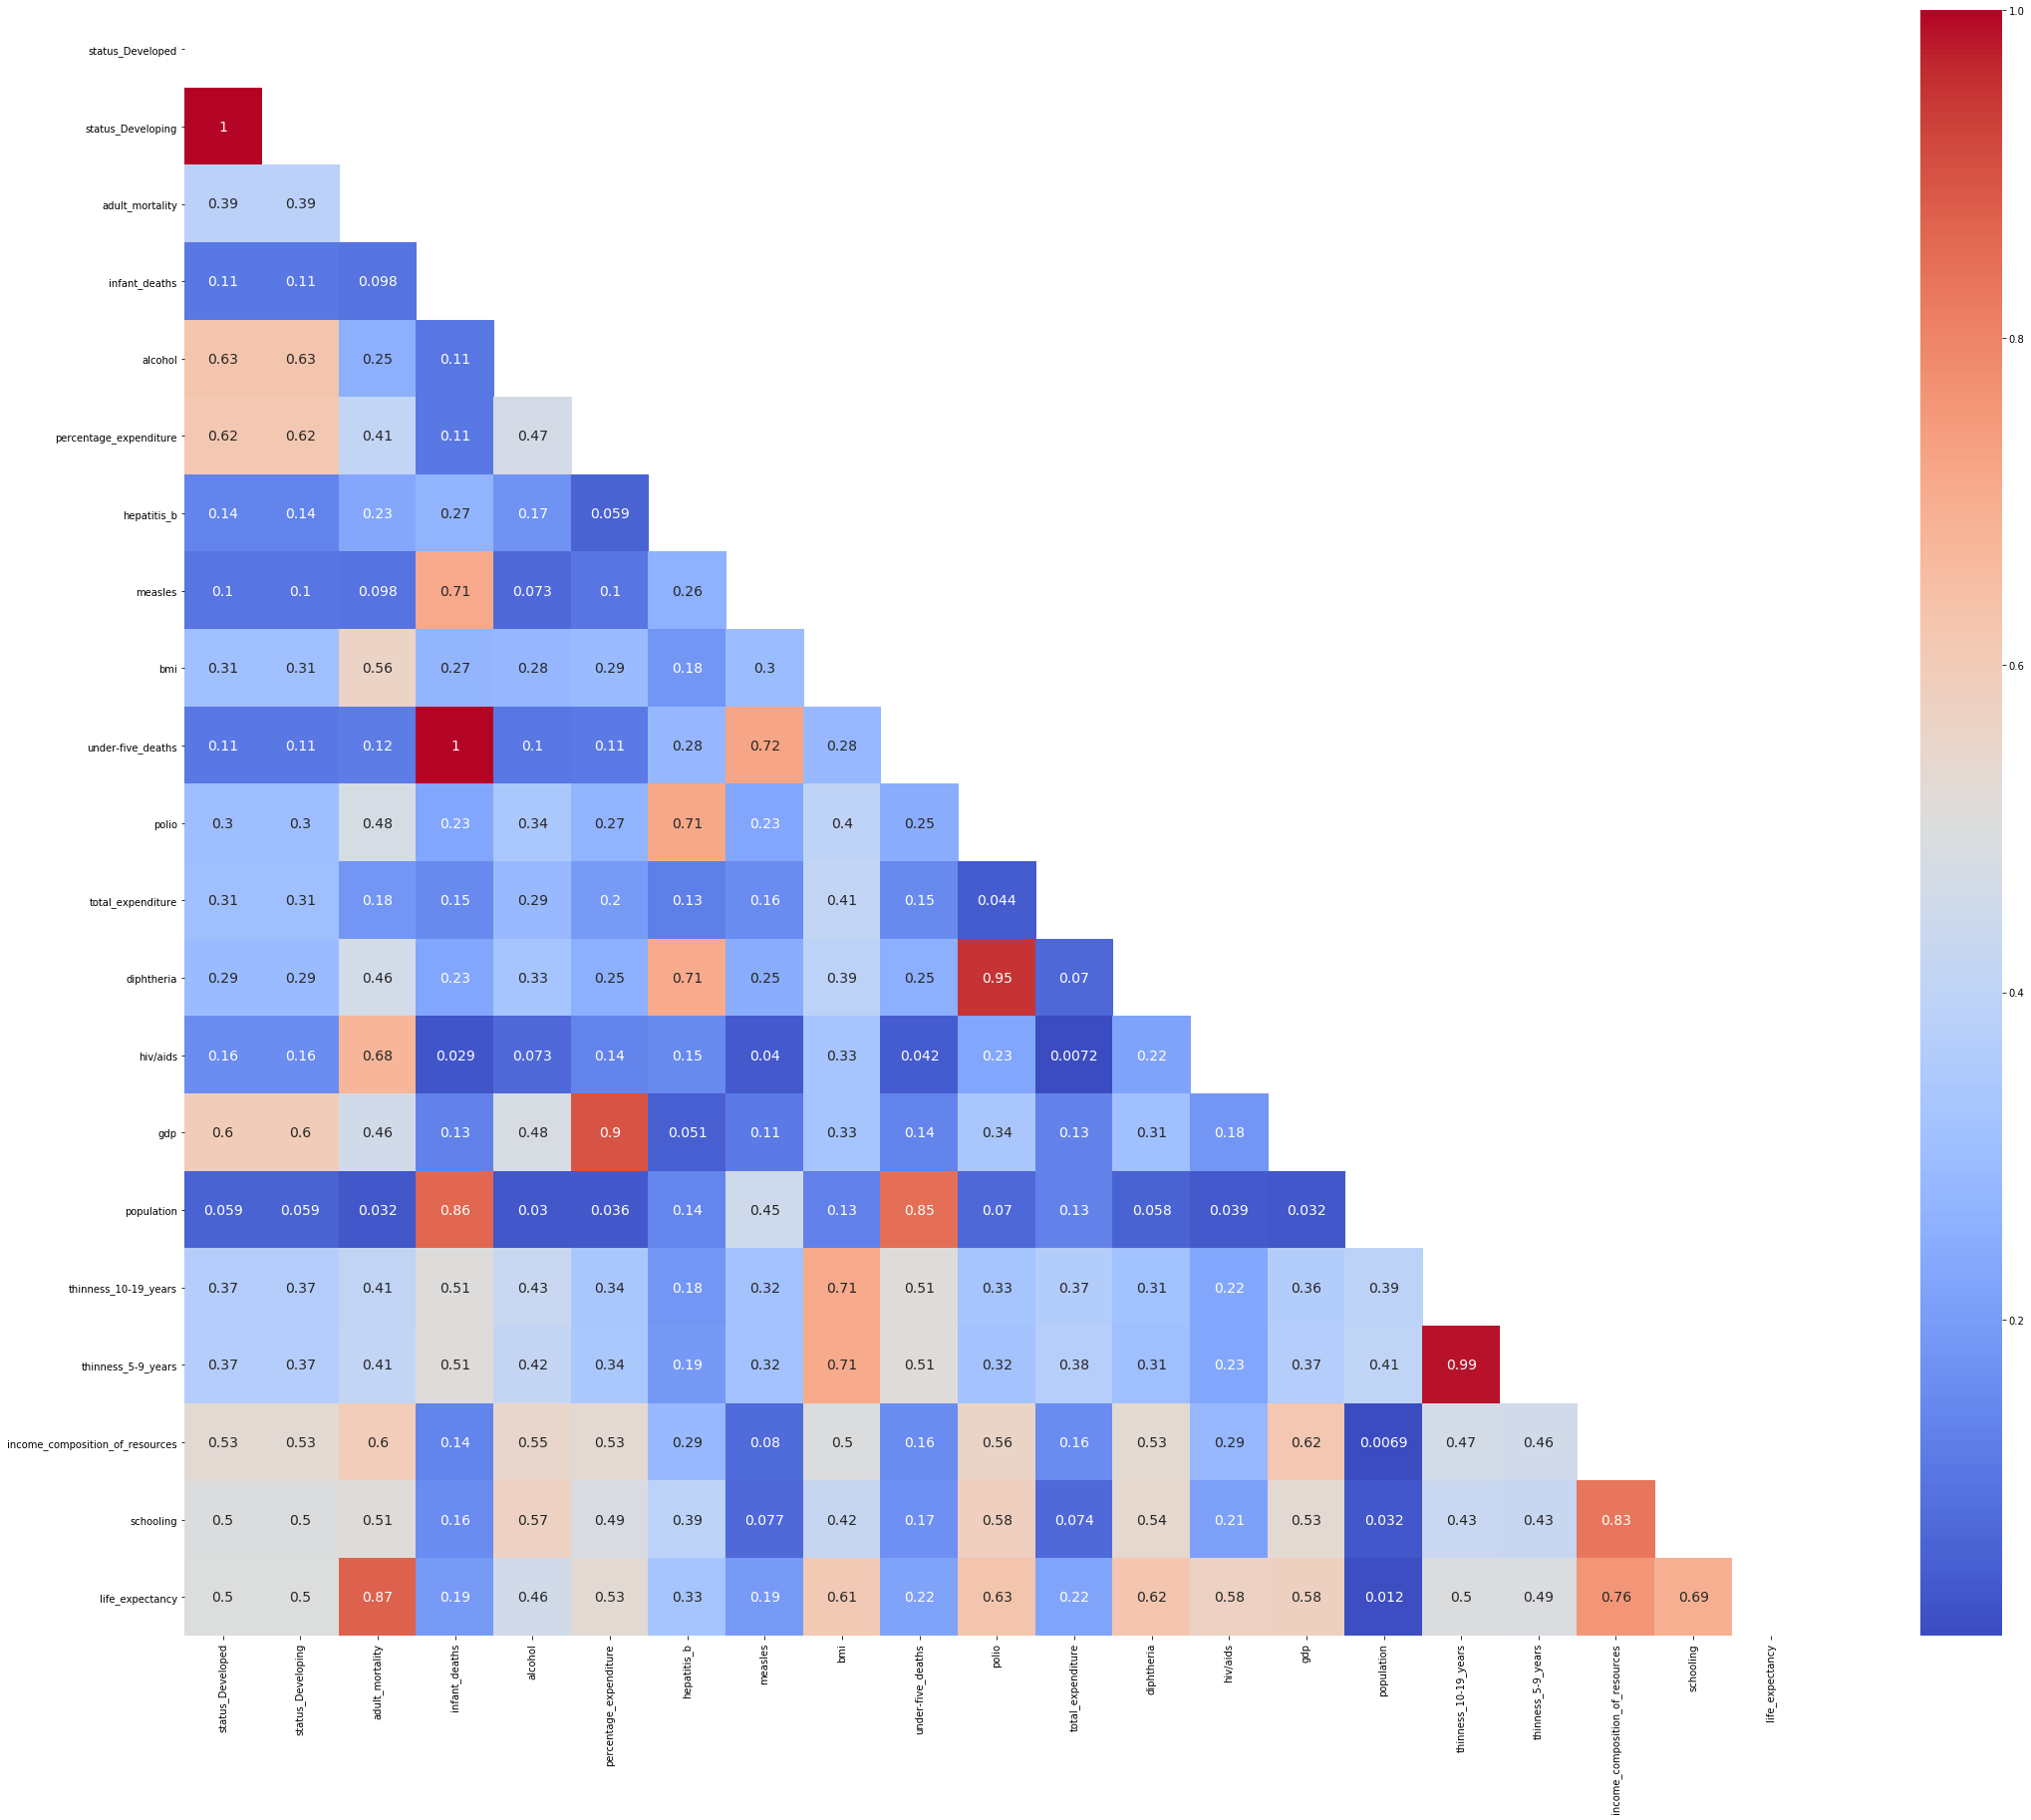

In [17]:
# Heat Map
f, axs = plt.subplots(figsize= (40,30))

mask = np.zeros_like(corrs, dtype = np.bool)

mask[np.triu_indices_from(mask)] = True

sns.heatmap(corrs, mask = mask, ax = axs, annot = True, 
            square = True, cmap = 'coolwarm', annot_kws = {'size': 14})
plt.show()

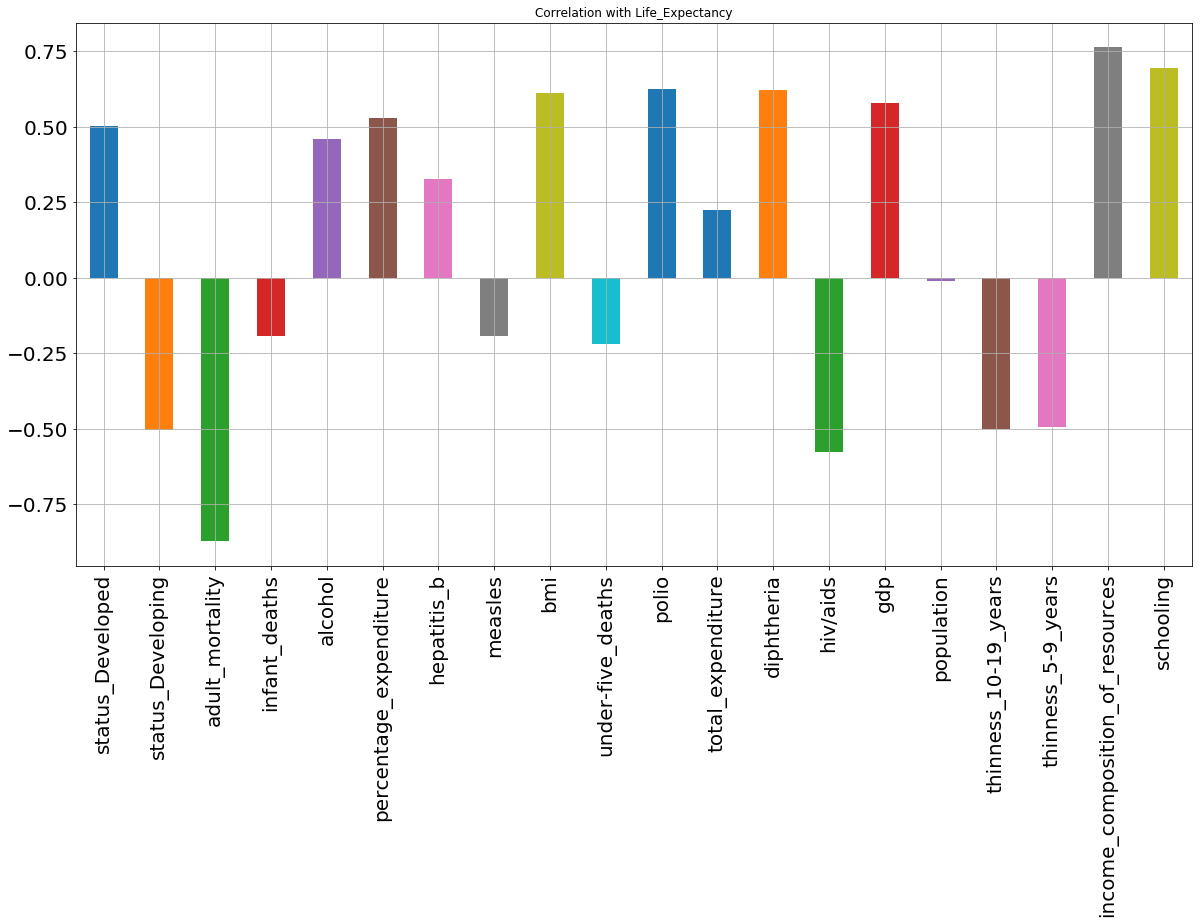

In [18]:
# Now, let us examine the relationship between Features and Target Variable
df.drop(columns = 'life_expectancy').corrwith(df['life_expectancy']).plot.bar(figsize = (20, 10), 
                                                                              title = 'Correlation with Life_Expectancy', 
                                                                              fontsize = 20, rot = 90, grid = True)

plt.show()

Aside other expected outcomes. It is interesting to see that the more alchohol a country consumes the higher the life expectancy... Another insight is to see the clear divergence our initial label encoding in `status` has. 

To further test the underlying relationship in our features and how they influence `life_Expectancy` we employ certain algorithms to create models, and the first step is to split the data.

<a class='anchor' id='2'></a>
## Split Dataset

In [19]:
## Convert DataFrame to array
array = df.values
print('We have {} countries and {} columns'.format(array.shape[0], array.shape[1]))

We have 193 countries and 21 columns


In [20]:
X = array[:, 0:20]
y = array[:, 20]

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                  test_size = 0.2, 
                                                  random_state = 123)

In [22]:
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)

X_val = StandardScaler().fit_transform(X_val)

# Model Revision: Checking Algorithm

Essentially whenever we want to model a continuous variable it is called a Regression, for now we will explore the following model algorithm:
- Linear and Ridge Regression
- Decision and ExtraTreeClassifier
- RandomForestClassfier

## Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
linR = LinearRegression()

linR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Model Parameters

In [24]:
def pretty_print_coefs(coefs, df, names = None, sort = False):
    if names == None:
        names = [ x for x in df.columns]
    lst = zip(coefs, names)
    if sort: # = True
        lst = sorted(lst, key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s\n" % (round(coef, 3), name)
                     for coef, name in lst)

print("Linear Regression Model:\n Intercept: {}%\n\n Slope: \n{} ".
      format(round(linR.intercept_, 3), pretty_print_coefs(linR.coef_, df)))

Linear Regression Model:
 Intercept: 69.021%

 Slope: 
-0.121 * status_Developed
 + 0.121 * status_Developing
 + -4.281 * adult_mortality
 + 8.602 * infant_deaths
 + 0.695 * alcohol
 + 0.623 * percentage_expenditure
 + -0.158 * hepatitis_b
 + -0.23 * measles
 + 0.325 * bmi
 + -9.252 * under-five_deaths
 + -0.98 * polio
 + 0.61 * total_expenditure
 + 2.311 * diphtheria
 + -1.242 * hiv/aids
 + 0.387 * gdp
 + 0.291 * population
 + -0.629 * thinness_10-19_years
 + 0.859 * thinness_5-9_years
 + 1.036 * income_composition_of_resources
 + 1.259 * schooling
 


In [25]:
df['life_expectancy'].mean()

69.07182642487045

### Predictions

In [26]:
predictions = linR.predict(X_val)

## Testing Linear Regression Predictions

In [27]:
test_pred = pd.DataFrame({'Auctual':y_val.flatten(),
                         'Predicted': predictions.flatten(),
                         'Diff': (y_val - predictions).flatten()})


print(test_pred.head(), '\n')
print(test_pred['Diff'].mean())

    Auctual  Predicted      Diff
0  59.86875  60.434433 -0.565683
1  75.05625  71.772109  3.284141
2  70.35625  67.998984  2.357266
3  64.75625  64.598031  0.158219
4  74.50000  72.526921  1.973079 

0.24980644355644444


### Visualizing Accuracy: Histograms

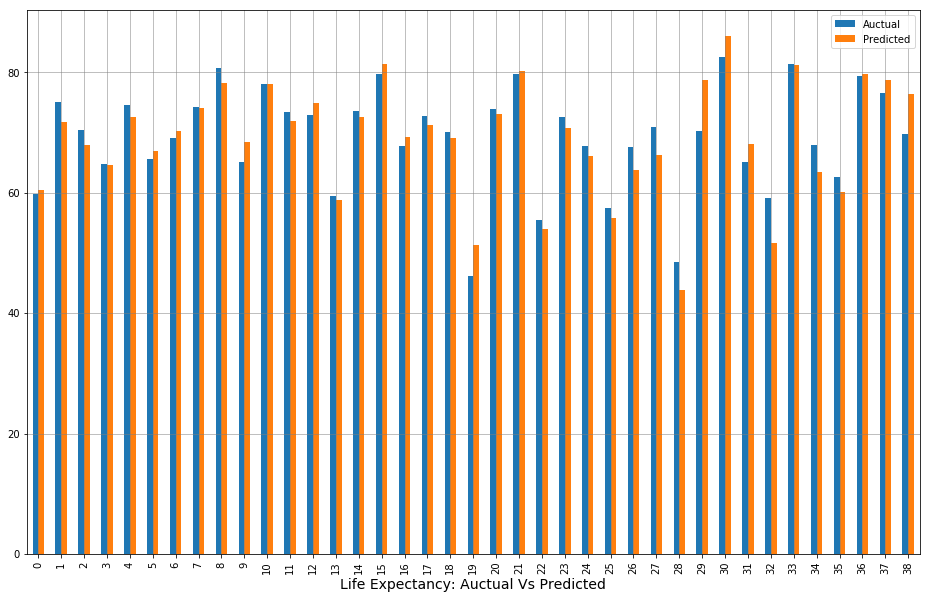

In [28]:
#test_pred = test_pred.drop(columns = ['Diff'])

test_pred.drop(columns='Diff').plot(kind = 'bar', figsize = (16, 10))

plt.grid(which = 'major', linestyle = '-', 
         linewidth = '0.5', color = 'grey')

plt.grid(which = 'minor', linestyle = ':', 
         linewidth = '0.5', color = 'black')

plt.xlabel('Life Expectancy: Auctual Vs Predicted', fontsize = 14)

plt.show()

Our model is good, but not an excellent predictor..

### Linear Regression: Error Metrics

In [29]:
from sklearn import metrics

print('MAE:  {:.5f}\n'.
      format(metrics.mean_absolute_error(y_val, predictions)))

print('MSE:  {:.5f}\n'.
      format(metrics.mean_squared_error(y_val, predictions)))

print('RMSE: {:.5f}\n'.
      format(np.sqrt(metrics.mean_squared_error(y_val, predictions))))

MAE:  2.38198

MSE:  9.66492

RMSE: 3.10885



## Applying Model: Ridge Regression

In [30]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 1.0)
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [31]:
print("Ridge Regression Model:\n Intercept: {}%\n\n Slope: \n{} ".
      format(round(ridge.intercept_, 3), pretty_print_coefs(ridge.coef_, df)))

Ridge Regression Model:
 Intercept: 69.021%

 Slope: 
-0.095 * status_Developed
 + 0.095 * status_Developing
 + -4.207 * adult_mortality
 + 1.8 * infant_deaths
 + 0.554 * alcohol
 + 0.592 * percentage_expenditure
 + -0.274 * hepatitis_b
 + -0.234 * measles
 + 0.299 * bmi
 + -2.704 * under-five_deaths
 + -0.673 * polio
 + 0.655 * total_expenditure
 + 2.264 * diphtheria
 + -1.306 * hiv/aids
 + 0.355 * gdp
 + 0.601 * population
 + -0.463 * thinness_10-19_years
 + 0.713 * thinness_5-9_years
 + 1.151 * income_composition_of_resources
 + 1.246 * schooling
 


### Predictions

In [32]:
ridge_pred = ridge.predict(X_val)

## Testing Ridge Regression Predictions

In [33]:
ridge_pred_df = pd.DataFrame({'Auctual':y_val.flatten(),
                         'Predicted': ridge_pred.flatten(),
                         'Diff': (y_val - ridge_pred).flatten()})


print(ridge_pred_df.head(), '\n')
print(ridge_pred_df['Diff'].mean())

    Auctual  Predicted      Diff
0  59.86875  60.285209 -0.416459
1  75.05625  71.682644  3.373606
2  70.35625  67.337556  3.018694
3  64.75625  64.177887  0.578363
4  74.50000  72.442910  2.057090 

0.24980644355644463


### Visualizing Accuracy: Histograms

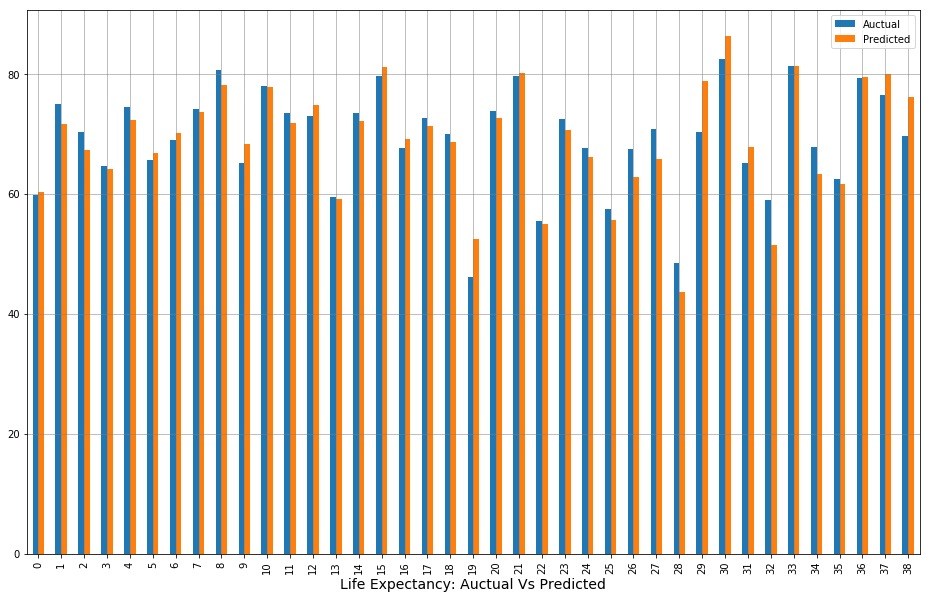

In [34]:
ridge_pred_df.drop(columns = 'Diff').plot(kind = 'bar', figsize = (16, 10))

plt.grid(which = 'major', linestyle = '-', 
         linewidth = '0.5', color = 'grey')

plt.grid(which = 'minor', linestyle = ':', 
         linewidth = '0.5', color = 'black')

plt.xlabel('Life Expectancy: Auctual Vs Predicted', fontsize = 14)

plt.show()

In [35]:
from sklearn import metrics

print('MAE:  {:.5f}\n'.
      format(metrics.mean_absolute_error(y_val, ridge_pred)))

print('MSE:  {:.5f}\n'.
      format(metrics.mean_squared_error(y_val, ridge_pred)))

print('RMSE: {:.5f}\n'.
      format(np.sqrt(metrics.mean_squared_error(y_val, ridge_pred))))

MAE:  2.45148

MSE:  10.51188

RMSE: 3.24220



## Applying Model: RandomForestRegressor

#### Tweaking HyperParameters

In [36]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

a =[]
for i in range(1, 50, 5):
    a.append(i)

folds = StratifiedKFold(n_splits = 10, random_state = 1, shuffle = True)    
    
parameter_grid = {'max_depth' : a,
                  'criterion' : ['mse','mae'],
                  'random_state' : a,
                 }

grid_search = GridSearchCV(rfr, 
                           param_grid=parameter_grid)
grid_search.fit(X_train, y_train)

print('Best parameters: {}'.format(grid_search.best_params_))
print('Best parameters: {}'.format(grid_search.best_score_))

Best parameters: {'criterion': 'mse', 'max_depth': 6, 'random_state': 21}
Best parameters: 0.88449388790142


In [37]:
from sklearn.ensemble import RandomForestRegressor

rfc = RandomForestRegressor(max_depth = 6, random_state = 21)
rfc = rfc.fit(X_train, y_train)

In [38]:
rfc_pred = rfc.predict(X_val)

## Testing RandomForest Regression Predictions

In [39]:
rfc_pred_df = pd.DataFrame({'Auctual':y_val.flatten(),
                         'Predicted': rfc_pred.flatten(),
                         'Diff': (y_val - rfc_pred).flatten()})


print(rfc_pred_df.head(), '\n')
print(rfc_pred_df['Diff'].mean())

    Auctual  Predicted      Diff
0  59.86875  58.973266  0.895484
1  75.05625  72.817500  2.238750
2  70.35625  70.033105  0.323145
3  64.75625  63.310625  1.445625
4  74.50000  72.573175  1.926825 

0.4522901511789927


### Visualizing Accuracy: Histograms

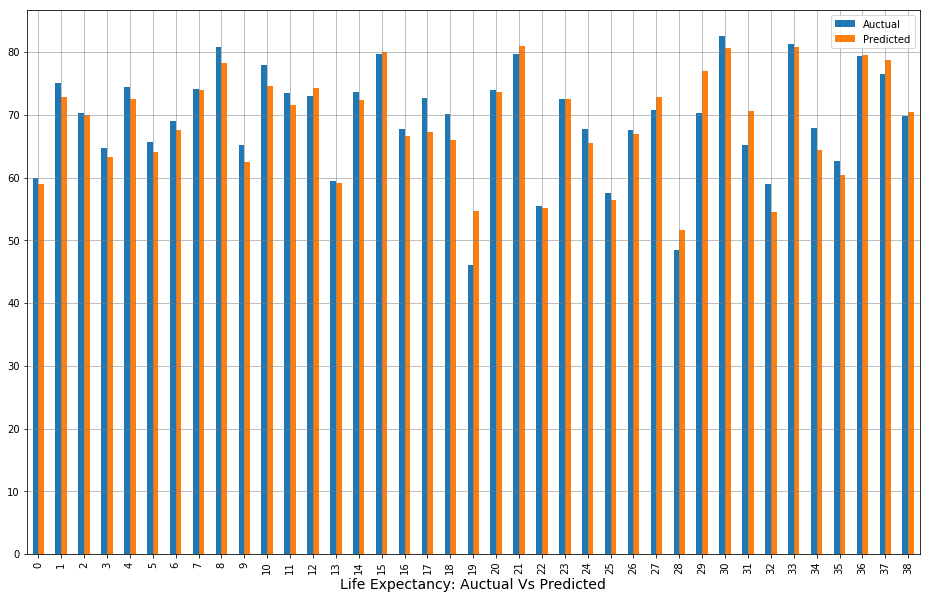

In [40]:
rfc_pred_df.drop(columns = 'Diff').plot(kind = 'bar', figsize = (16, 10))

plt.grid(which = 'major', linestyle = '-', 
         linewidth = '0.5', color = 'grey')

plt.grid(which = 'minor', linestyle = ':', 
         linewidth = '0.5', color = 'black')

plt.xlabel('Life Expectancy: Auctual Vs Predicted', fontsize = 14)

plt.show()

In [41]:
from sklearn import metrics

print('MAE:  {:.5f}\n'.
      format(metrics.mean_absolute_error(y_val, rfc_pred)))

print('MSE:  {:.5f}\n'.
      format(metrics.mean_squared_error(y_val, rfc_pred)))

print('RMSE: {:.5f}\n'.
      format(np.sqrt(metrics.mean_squared_error(y_val, rfc_pred))))

MAE:  2.07879

MSE:  7.99197

RMSE: 2.82701



The Random Forest Regressor provides us with the least RMSE, even though other the compare well the `le_Df` mean value, the author is still working on really interpreting the Root Mean Squared Error of a dataset, the next and final step is to save our model. 

A fun exercise would be to create a `dict` based on our columns and predict the life expectancy. 